## Microsoft DAT102x Microsoft Professional Capstone  Data Science


## Starting to write coding (input file: test_values_K7FqC54.csv, train_labels.csv, train_values_6tLXv3T.csv)
By: Muhamad Amirul Rasyid Bin Sa'don


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
#import xgboost as xgb
train_y = pd.read_csv('C:/Users/muham/Desktop/attachments/train_labels.csv')
train_x = pd.read_csv('C:/Users/muham/Desktop/attachments/train_values_6tLXv3T.csv')
test = pd.read_csv('C:/Users/muham/Desktop/attachments/test_values_K7FqC54.csv')
print(train_x.shape,train_y.shape,test.shape)
# train_x.columns
print(train_y.prevalence_of_undernourishment.describe())

(1401, 46) (1401, 2) (616, 46)
count    1401.000000
mean       15.510697
std        11.610440
min         2.493428
25%         5.710856
50%        12.118656
75%        22.447492
max        59.089781
Name: prevalence_of_undernourishment, dtype: float64


In [4]:
#To Answer Data Exploration Questions
# df =train_x
# df['target'] = train_y.prevalence_of_undernourishment
# x = df.groupby('year')
# x.median().target
# x.mean().target


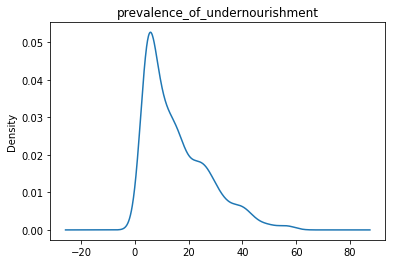

In [41]:
#target distribution
train_y.prevalence_of_undernourishment.plot(kind='density',title='prevalence_of_undernourishment')

In [7]:
#Makes correlation between train_y and columns
imp_num=[]
imp=[]
for i in train_x.columns[3:-1]:
    tmp = train_y.prevalence_of_undernourishment.corr(train_x[i])
    print(i,':',tmp)
    imp += [abs(tmp)]
    if abs(tmp)>0.5:
        imp_num += [i]
#         print(i,':',tmp)
# plt.plot(df_num.columns,imp)
print(imp_num)

agricultural_land_area : 0.006627019407177673
percentage_of_arable_land_equipped_for_irrigation : -0.13804832873565076
cereal_yield : -0.24946974949317385
droughts_floods_extreme_temps : 0.23699225101399282
forest_area : -0.003169208649612567
total_land_area : -0.0024533934280382913
fertility_rate : 0.4971075276286521
life_expectancy : -0.4762636882424871
rural_population : 0.05446331980945151
total_population : 0.02569498199735084
urban_population : -0.033759231493159896
population_growth : 0.2552048982710409
avg_value_of_food_production : -0.3897199975821519
cereal_import_dependency_ratio : 0.04633042477600194
food_imports_as_share_of_merch_exports : 0.18175593862572686
gross_domestic_product_per_capita_ppp : -0.3355129197133177
imports_of_goods_and_services : -0.0015793586431821895
inequality_index : 0.18479907925171132
net_oda_received_percent_gni : 0.37788788969120995
net_oda_received_per_capita : 0.021530719418286697
tax_revenue_share_gdp : -0.18108905400981284
trade_in_services 

Catogory: Index(['country_code', 'year'], dtype='object')


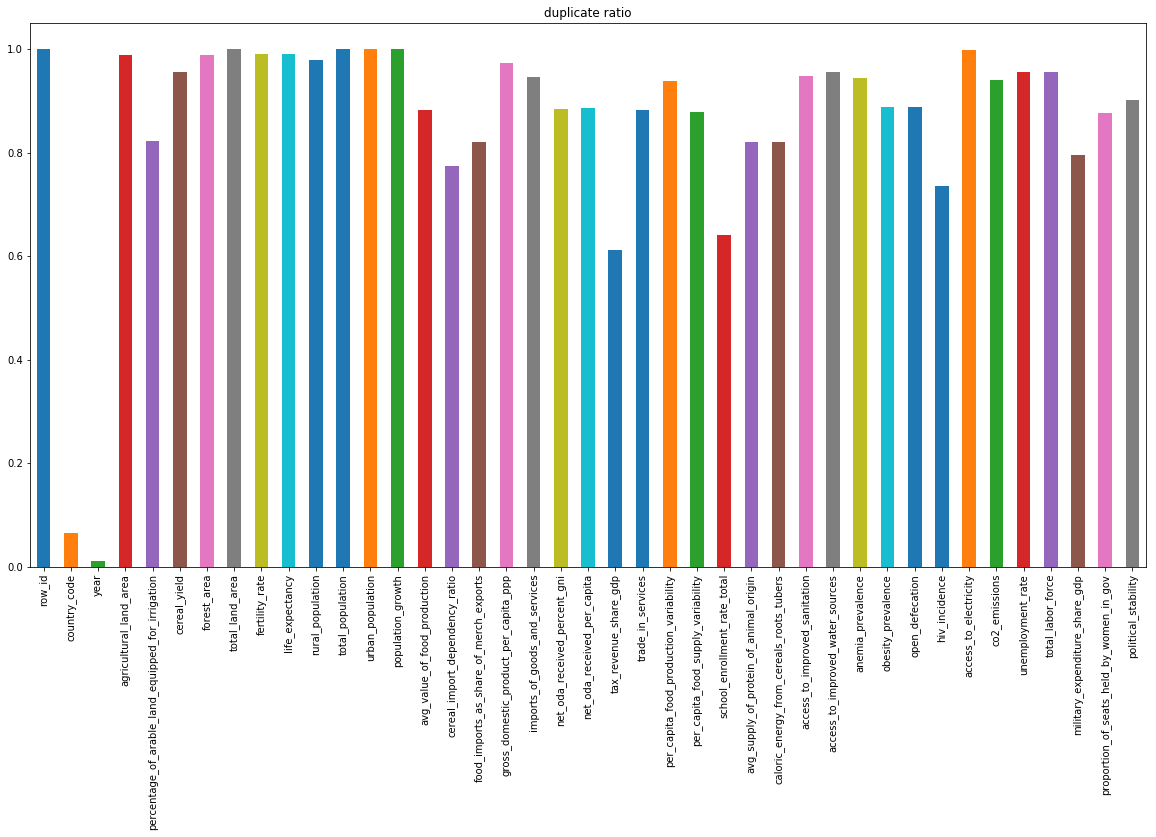

In [53]:
# duplicate ratio
plt.figure(figsize=(20,10))
(train_x.apply(lambda x:x.unique().shape[0],axis=0)/train_x.shape[0]).plot(kind='bar',title='duplicate ratio')
print('Catogory:',train_x.columns[1:3])
#check whether id has duplicate rows
assert len(train_x.row_id.unique())-train_x.shape[0]==0

## Handle missing values

na.ratio>0.4 :
droughts_floods_extreme_temps    0.946467
inequality_index                 0.693790
adult_literacy_rate              0.796574
school_enrollment_rate_female    0.432548
rail_lines_density               0.673804
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


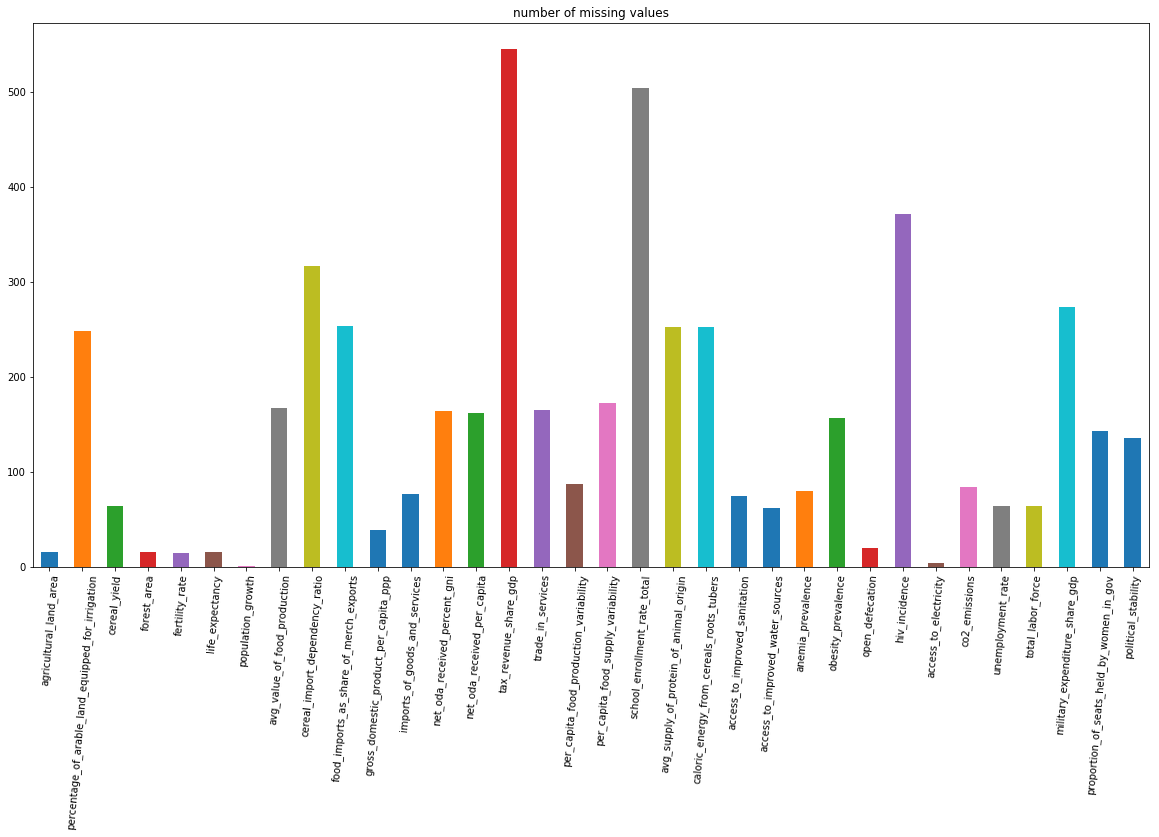

In [43]:
#remove na.ratio>0.4 columns
na_ratio = train_x.isna().sum()/train_x.shape[0]
tmp = na_ratio[na_ratio>0.4]
print('na.ratio>0.4 :',tmp,sep='\n')
droped_columns=tmp.index
train_x = train_x.drop(columns=droped_columns)
tmp = train_x.isna().sum()/train_x.shape[0]
tmpp = tmp[tmp>0]
plt.figure(figsize=(20,10))
print(train_x[tmpp.index].isnull().sum().plot(kind='bar',rot=85,title='number of missing values'))

AxesSubplot(0.125,0.125;0.775x0.755)


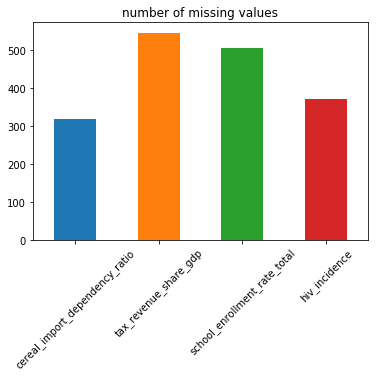

In [44]:
#rest high na_ratio columns
tmpp = tmp[tmp>0.2]
print(train_x[tmpp.index].isnull().sum().plot(kind='bar',rot=45,title='number of missing values'))

In [ ]:
x

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test = scaler.transform(test)

ValueError: could not convert string to float: '5c2e474'

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x, train_y)

pred_y = classifier.predict(test)

ValueError: could not convert string to float: '5c2e474'

In [31]:
#fillna with KNN
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_x.iloc[:,3:])
#train_x2 = KNeighborsClassifier(k=5).fit_transform(train_x.iloc[:,3:])
train_x_df = pd.DataFrame(data=classifier.fit,index=range(1401),columns=train_x.columns[3:])
train_x_df['year'] = train_x.year
train_x = train_x_df
assert train_x.shape[1]==39
assert train_x.isna().any().sum()==0

TypeError: fit() missing 1 required positional argument: 'y'

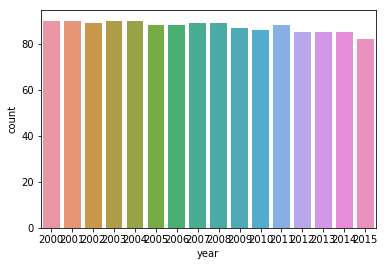

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


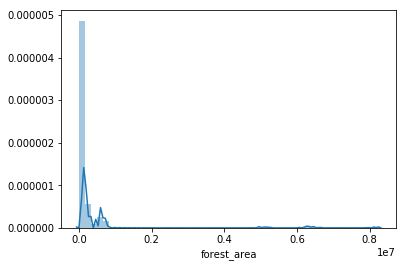

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


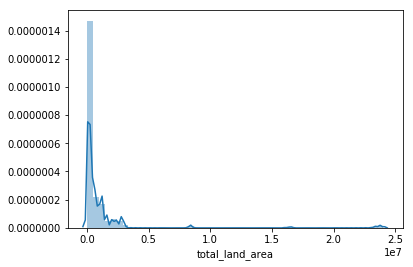

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


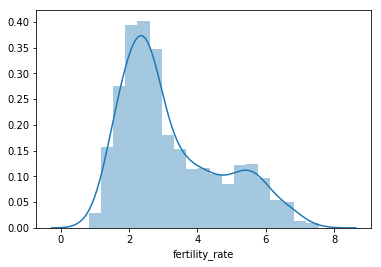

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


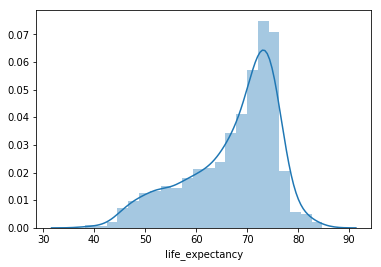

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


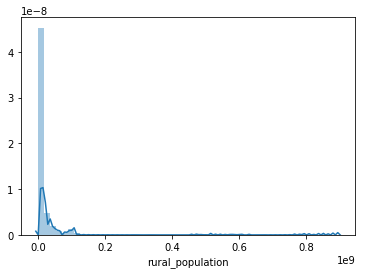

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


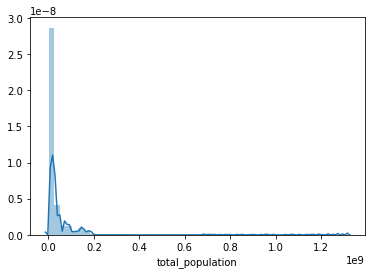

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


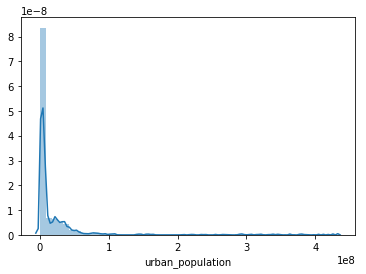

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


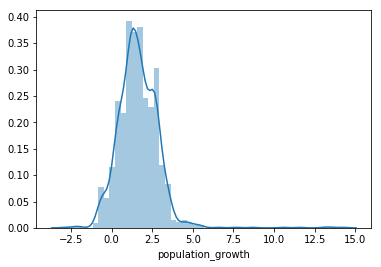

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


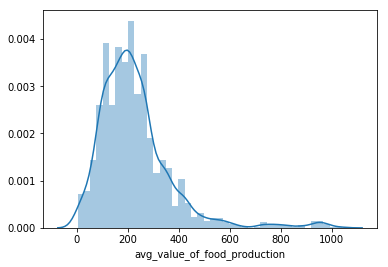

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


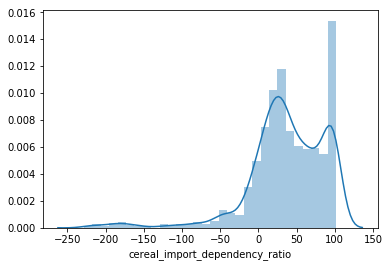

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


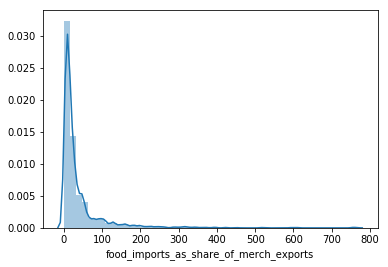

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


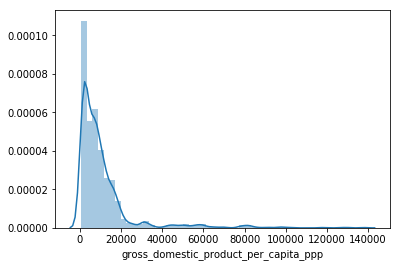

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


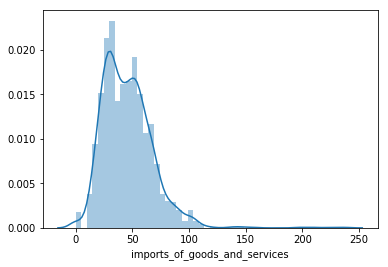

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


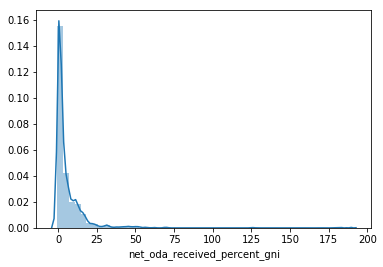

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


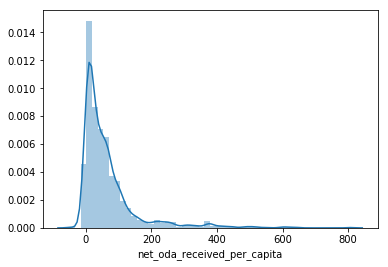

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


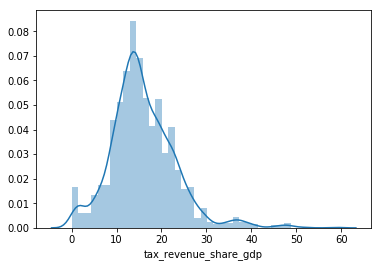

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


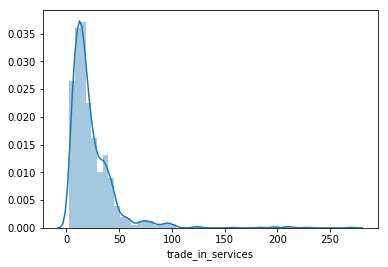

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


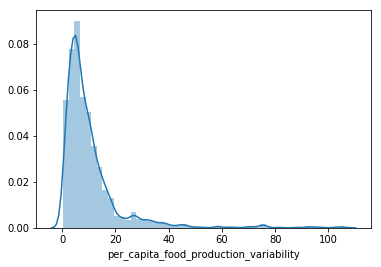

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


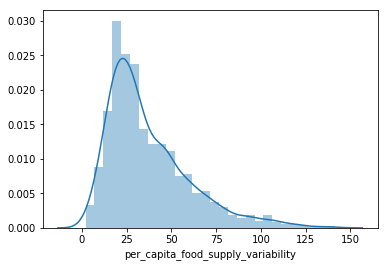

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


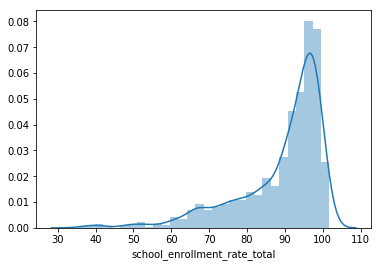

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


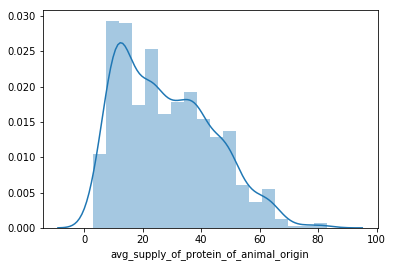

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


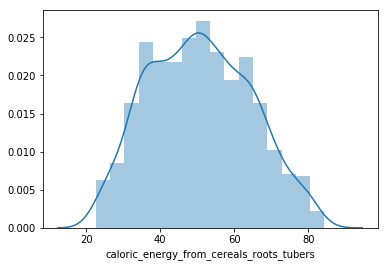

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


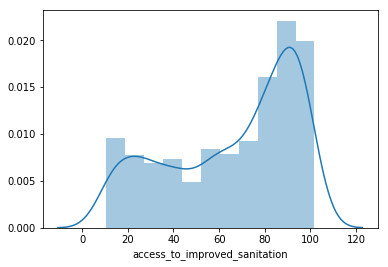

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


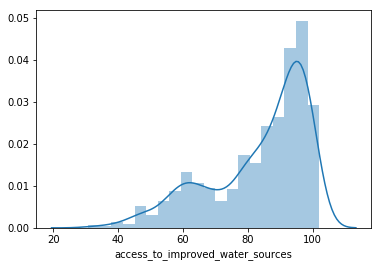

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


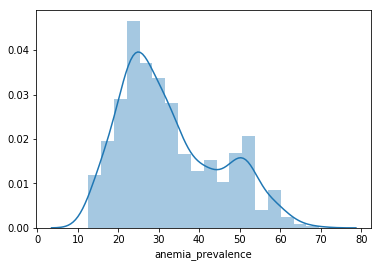

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


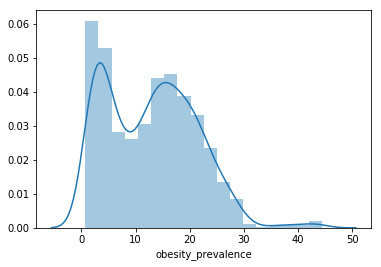

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


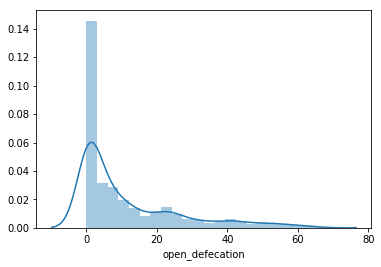

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


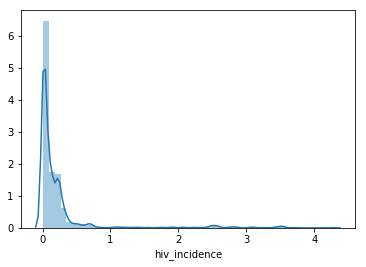

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


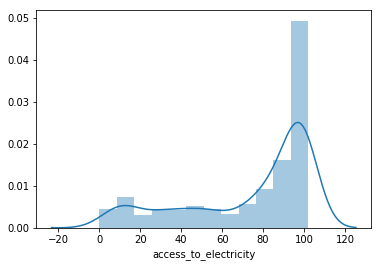

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


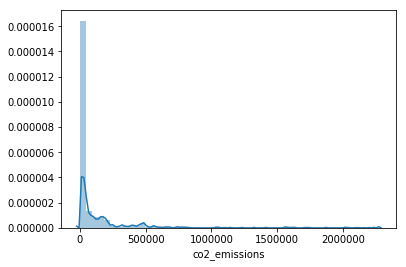

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


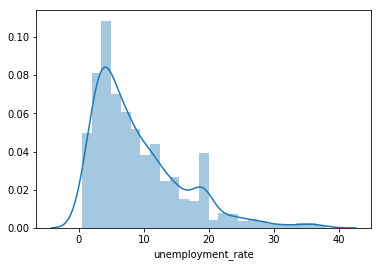

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


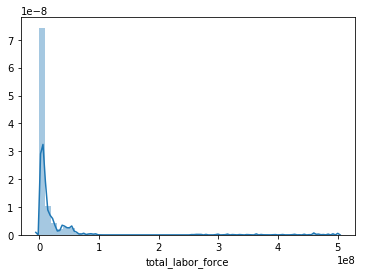

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


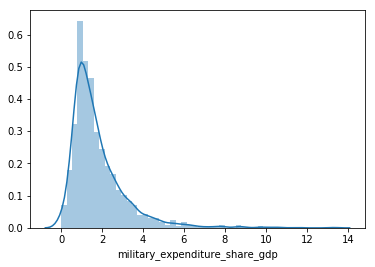

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


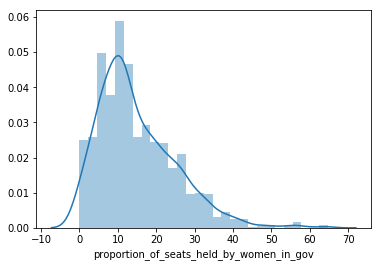

C:\Users\Mozzie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


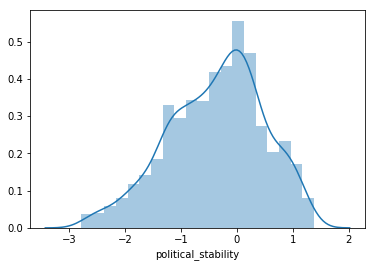

In [53]:
#print columns distribution
sns.countplot(x='year', data=train_x)
plt.show()
for i in train_x.columns[3:-1]:
    sns.distplot(train_x[i])
    plt.show()

## Handle ouliers

In [54]:
#replace outliers
for col in train_x.columns[3:-1]:
    scaler = StandardScaler()
    scaler.fit(train_x[[col]])
    ss = scaler.transform(train_x[[col]])
    maxv = ss.mean()+3*ss.std()
    minv = ss.mean()-3*ss.std()
    for i in range(len(ss)):
        if ss[i]<minv:
            ss[i] = minv
        if ss[i]>maxv:
            ss[i] = maxv
    train_x[col] = scaler.inverse_transform(ss)

## Dealing with Multi-Collinearity problem

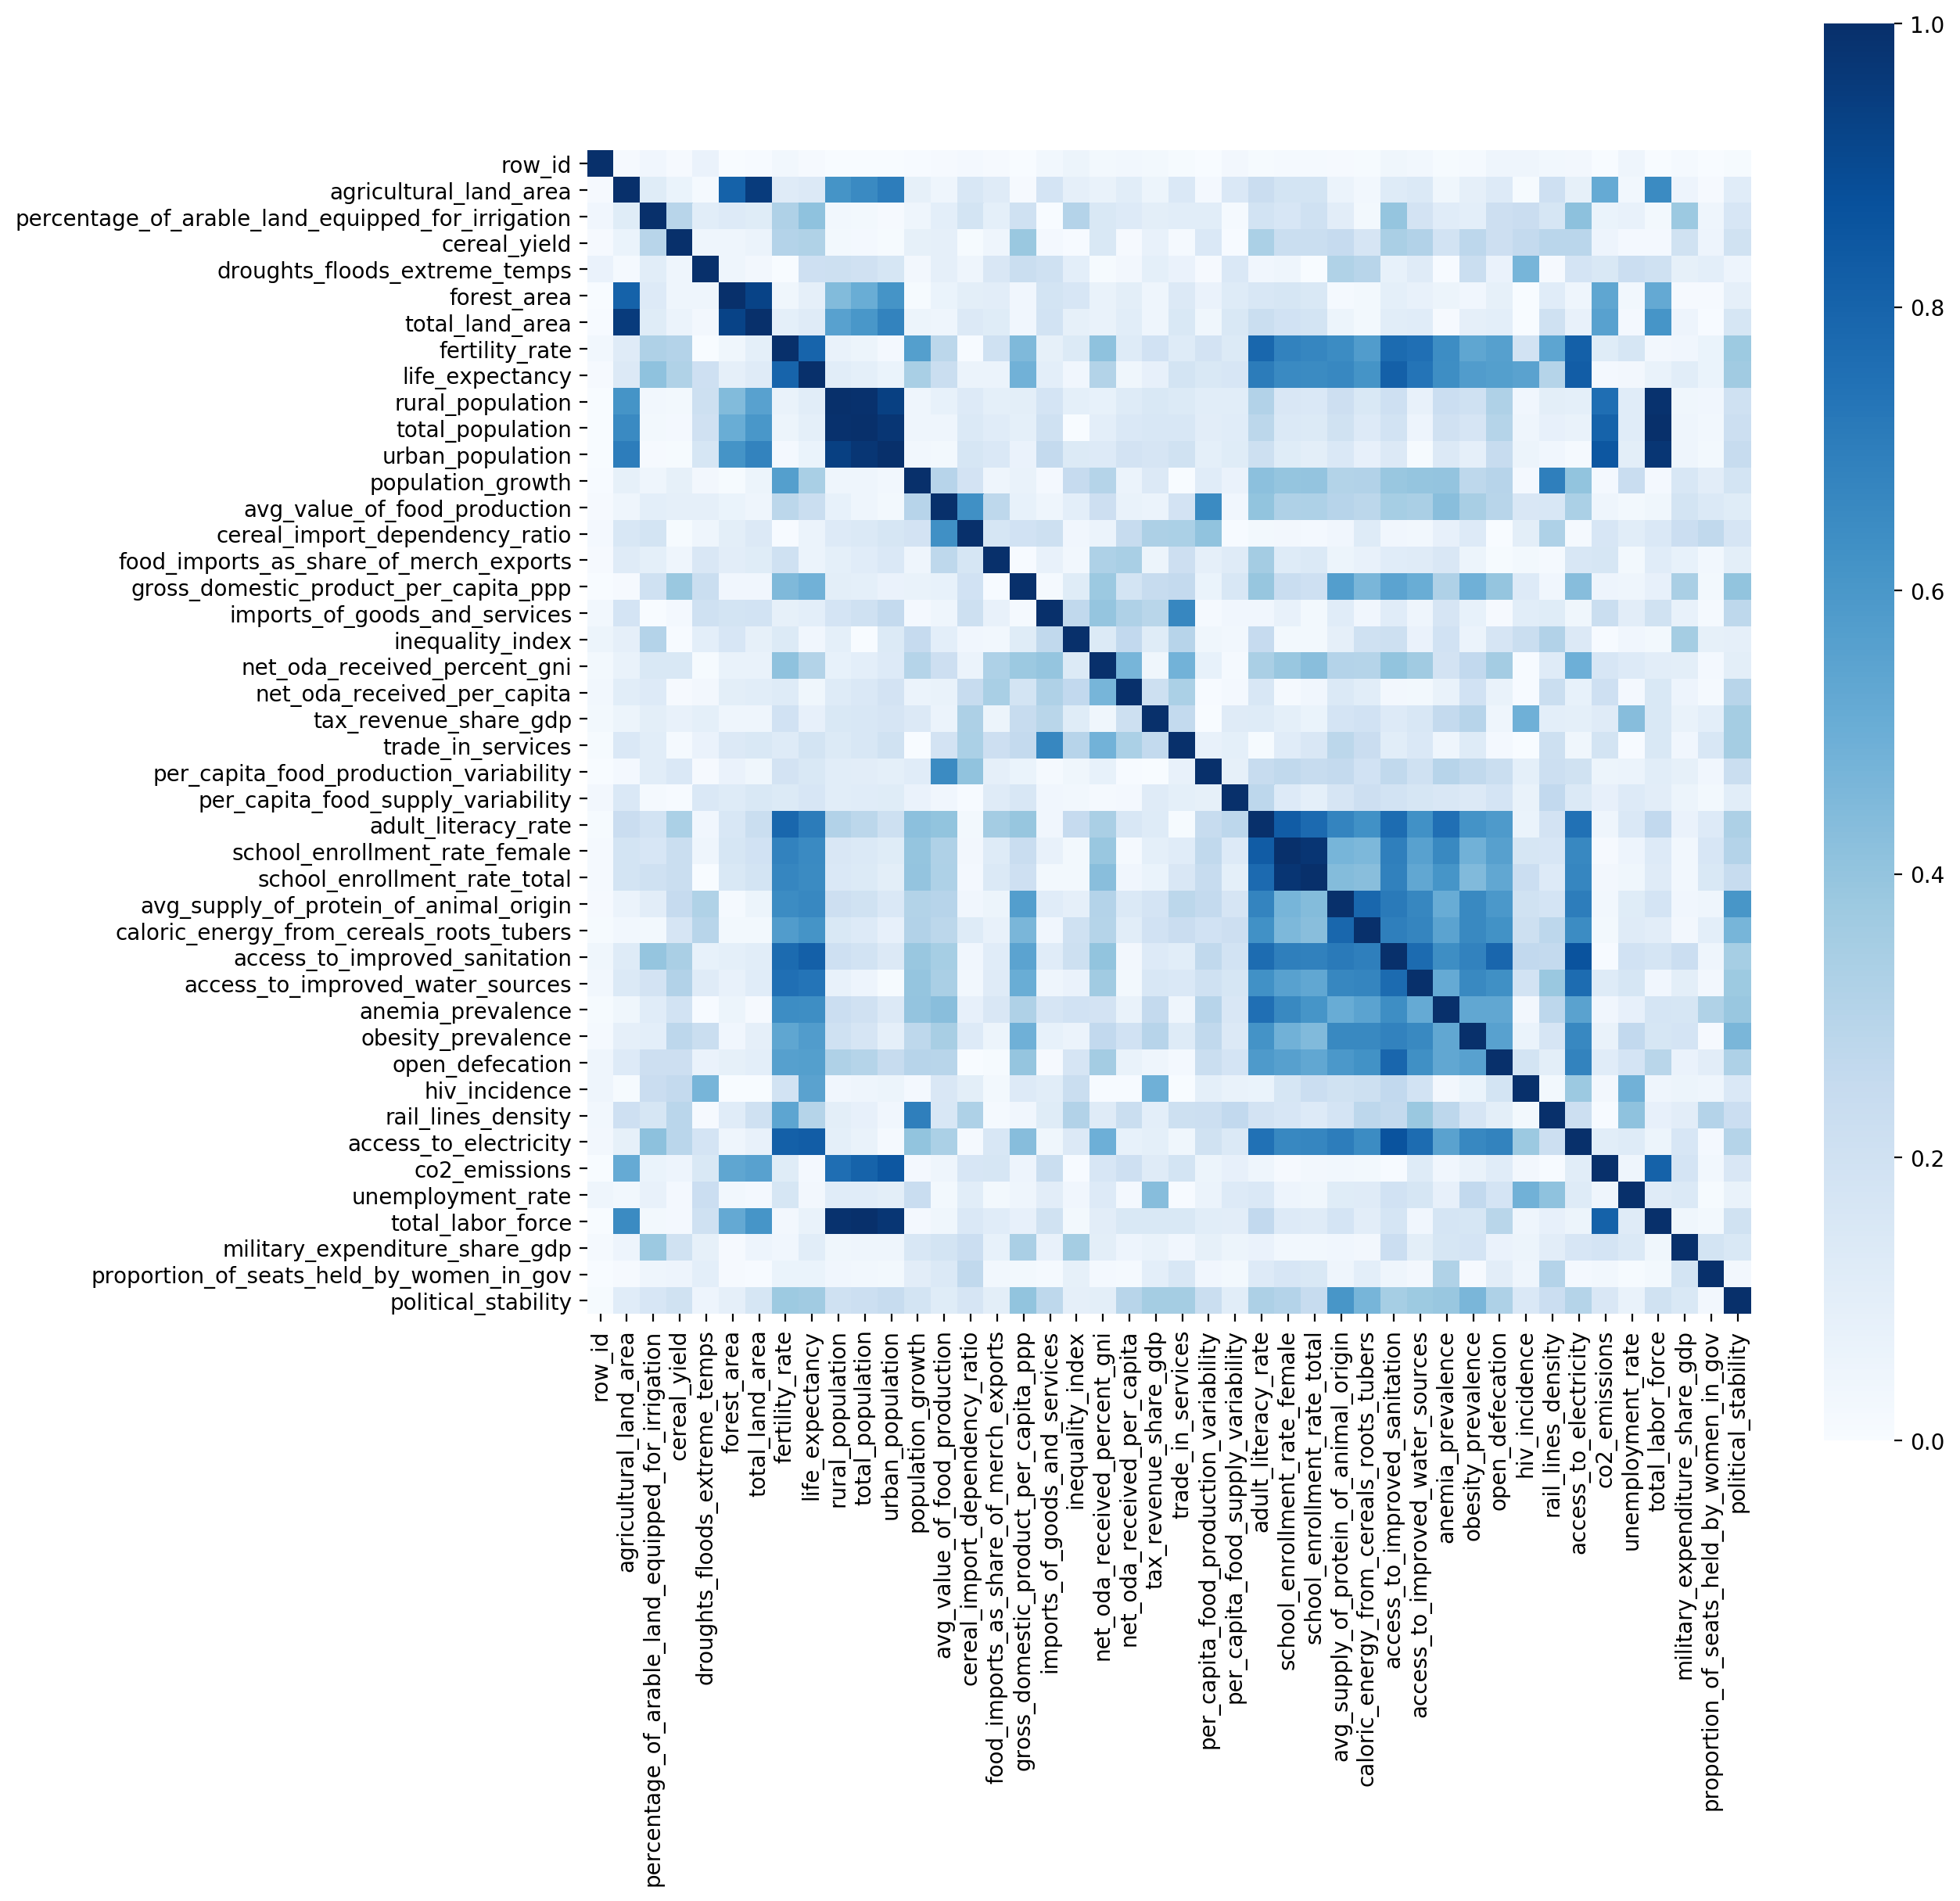

In [33]:
#print correlation table
plt.figure(figsize=(12,12),dpi=200)
sns.heatmap( abs(train_x.drop(columns=['year']).corr()),cmap="Blues",
             vmin=0,
             vmax=1,
             square=True,
             annot=False)
plt.show()

In [56]:
#list high correlation column pairs
tmp = abs(train_x.drop(columns=['year']).corr())
tmpp = tmp[tmp!=1]
pair=[]
prePCA=[]
for i in range(tmpp.shape[0]):
    for j in range(tmpp.shape[0]):
        if tmpp.iloc[i,j]>0.7:
            pair += [tmpp.columns[i]+tmpp.columns[j]]
            if tmpp.columns[j]+tmpp.columns[i] not in pair:
                print(tmpp.columns[i],'--------',tmpp.columns[j])
                prePCA+=[(tmpp.columns[i],tmpp.columns[j])]


agricultural_land_area -------- forest_area
agricultural_land_area -------- total_land_area
agricultural_land_area -------- rural_population
agricultural_land_area -------- total_population
agricultural_land_area -------- urban_population
agricultural_land_area -------- total_labor_force
forest_area -------- total_land_area
forest_area -------- urban_population
total_land_area -------- total_population
total_land_area -------- urban_population
total_land_area -------- co2_emissions
total_land_area -------- total_labor_force
fertility_rate -------- life_expectancy
fertility_rate -------- access_to_improved_sanitation
fertility_rate -------- access_to_improved_water_sources
fertility_rate -------- access_to_electricity
life_expectancy -------- access_to_improved_sanitation
life_expectancy -------- access_to_improved_water_sources
life_expectancy -------- access_to_electricity
rural_population -------- total_population
rural_population -------- urban_population
rural_population -------- t

In [34]:
#list columns might have Multi-Collinearity problem
flattened_list = set([y for x in prePCA for y in x])
print(flattened_list)

NameError: name 'prePCA' is not defined

In [35]:
#try to fix Multi-Collinearity problem

train_x['rural_population'] = train_x.rural_population/train_x.total_population
train_x['urban_population'] = train_x.urban_population/train_x.total_population
train_x['agricultural_land_area'] = train_x.agricultural_land_area/train_x.total_land_area
train_x['forest_area'] = train_x.forest_area/train_x.total_land_area
train_x.rename(columns={'rural_population':'rural_population_ratio',
               'urban_population':'urban_population_ratio',
               'agricultural_land_area':'agricultural_land_area_ratio',
               'forest_area':'forest_area_ratio'},inplace=True)

def Polymerization(cols,new_name,data):
    pca = PCA(n_components=1)
    new_col = pca.fit_transform(data[cols])
    data.drop(columns=cols,inplace=True)
    data[new_name]=new_col
    return data

health_food = ['avg_supply_of_protein_of_animal_origin','caloric_energy_from_cereals_roots_tubers']
health_facility = ['life_expectancy','access_to_improved_sanitation','access_to_improved_water_sources','access_to_electricity','fertility_rate']
Polymerization(health_food,'health_food',train_x)
Polymerization(health_facility,'health_facility',train_x)
print(train_x.shape)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## One-hot encoding

In [59]:
#one-hot encoding catogory column
train_x = pd.get_dummies(data=train_x,columns=['year'])
print(train_x.shape)

(1401, 49)


## Prepare test data

In [60]:
def prepare_test(test):
    test.drop_duplicates(subset=['row_id'],inplace=True)
    test.drop(columns=['row_id','country_code'],inplace=True)
    test.drop(columns=droped_columns,inplace=True)
    knn = KNN(k=5).fit_transform(test.drop(columns=['year']))
    test2 = pd.DataFrame(data=knn,index=range(test.shape[0]),columns=test.drop(columns=['year']).columns)    
    test2['year'] = test.year
    assert test2.shape[1]==39
    assert test2.isna().any().sum()==0
    test2['rural_population'] = test2.rural_population/test2.total_population
    test2['urban_population'] = test2.urban_population/test2.total_population
    test2['agricultural_land_area'] = test2.agricultural_land_area/test2.total_land_area
    test2['forest_area'] = test2.forest_area/test2.total_land_area
    test2.rename(columns={'rural_population':'rural_population_ratio',
               'urban_population':'urban_population_ratio',
               'agricultural_land_area':'agricultural_land_area_ratio',
               'forest_area':'forest_area_ratio'},inplace=True)
    assert test2.isna().any().sum()==0
    Polymerization(health_food,'health_food',test2)
    Polymerization(health_facility,'health_facility',test2)
    test2 = pd.get_dummies(data=test2,columns=['year'])
    return test2
test = prepare_test(test)

Imputing row 1/616 with 3 missing, elapsed time: 0.104
Imputing row 101/616 with 1 missing, elapsed time: 0.104
Imputing row 201/616 with 0 missing, elapsed time: 0.104
Imputing row 301/616 with 1 missing, elapsed time: 0.104
Imputing row 401/616 with 12 missing, elapsed time: 0.120
Imputing row 501/616 with 1 missing, elapsed time: 0.120
Imputing row 601/616 with 10 missing, elapsed time: 0.120


In [17]:
#Save cleaned datasets
# train_x.to_csv('D:/cleaned_train_x.csv',index=False)
# train_y.iloc[:,1].to_csv('D:/cleaned_train_y.csv',index=False)

In [42]:
train_hf.shape,test_hf.shape

((1401, 1), (616, 1))

In [61]:
#Standardlization
train_x_org = train_x.copy()
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test = scaler.transform(test)
train_x.shape,train_y.shape,test.shape

((1401, 49), (1401, 2), (616, 49))

In [19]:
train_x.shape,train_y.prevalence_of_undernourishment.shape,test.shape

((1401, 49), (1401,), (616, 49))

## Feature selection

In [21]:
#feature selection
lcv = LassoCV(cv=10,alphas=[i/10000 for i in range(1000,15000,5)])
lcv.fit(train_x, train_y.iloc[:,1])
df_features = pd.DataFrame()
df_features['feature']=train_x_org.columns
df_features['coef']=lcv.coef_
df = df_features[abs(df_features.coef)>0]
# print(df.shape)
# df.sort_values('coef')

(37, 2)


,feature,coef
21,anemia_prevalence,-2.717874
22,obesity_prevalence,-2.576662
9,avg_value_of_food_production,-2.046897
30,political_stability,-1.868730
24,hiv_incidence,-1.352519
6,total_population,-1.041570
16,tax_revenue_share_gdp,-0.819035
13,imports_of_goods_and_services,-0.532720
25,co2_emissions,-0.411878
2,cereal_yield,-0.371198


In [62]:
#feature selection
lcv = LassoCV(cv=10,alphas=[i/10000 for i in range(10000,15000,5)])
sfm = SelectFromModel(lcv, threshold=0.25)
sfm.fit(train_x, train_y.iloc[:,1])
tmp = sfm.transform(train_x)
tmp2 = sfm.transform(test)
tmp.shape,tmp2.shape
# assert tmp.shape[1]==tmp2.transform(train_x).shape[1]

((1401, 7), (616, 7))

## simple linear regresion

In [37]:
train_hf = train_x.health_facility
test_hf = test.health_facility
scaler = StandardScaler()
scaler.fit(pd.DataFrame(train_hf))
train_hf = scaler.transform(pd.DataFrame(train_hf))
test_hf = scaler.transform(pd.DataFrame(test_hf))

AttributeError: 'DataFrame' object has no attribute 'health_facility'

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(train_hf,train_y.iloc[:,1])
pred_y = model.predict(test_hf)
pred_y

NameError: name 'train_hf' is not defined

## Random forest model

In [29]:
#Fitting RandomForest regressor
regr = RandomForestRegressor(n_estimators=271,oob_score=True,n_jobs=-1)
regr.fit(train_x, train_y.iloc[:,1])
pred_y = regr.predict(test)
print(pred_y)

ValueError: could not convert string to float: '5c2e474'

In [28]:
#Fitting RandomForest regressor with lesso feature selection
regr = RandomForestRegressor(max_depth=20, max_leaf_nodes=99,n_estimators=100,max_features=3,oob_score=True,n_jobs=-1)
regr.fit(tmp, train_y.iloc[:,1])
pred_y = regr.predict(tmp2)
print(pred_y)

ValueError: Expected 2D array, got 1D array instead:
array=[0.         0.         0.         0.01142041 0.17701642 0.04568166
 0.01142041 0.         0.00999286 0.01070664 0.         0.
 0.         0.00071378 0.11920057 0.22626695 0.1805853  0.02783726
 0.05496074 0.11705925 0.11563169 0.38900787 0.11777302 0.0620985
 0.12276945 0.35974303 0.17987151 0.17987151 0.05281942 0.04425411
 0.05710207 0.11206281 0.01427552 0.26481086 0.0028551  0.05995717
 0.04568166 0.04568166 0.19486082 0.10206995 0.09635974].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.plot(regr.predict(tmp)-train_y.iloc[:,1])

In [ ]:
regr.score(train_x,train_y.iloc[:,1])

In [ ]:
regr.score(tmp,train_y.iloc[:,1])

## xgboosting regrssor

In [ ]:
#Fitting XGB regressor 
# xgbm = xgb.XGBRegressor(n_estimators=2500,learning_rate=0.001,max_depth=9999999,min_child_weight=1,n_jobs=-1)
# print(xgbm)
# xgbm.fit(train_x,train_y.iloc[:,1])
# pred_y2 = xgbm.predict(test)
# print(pred_y2)

## Write out summition

In [27]:
# output
summit=pd.DataFrame()
summit['row_id']=range(test.shape[0])
summit['prevalence_of_undernourishment']=pred_y
summit.to_csv('C:/Users/muham/Desktop/attachments/summit.csv',index=False)

NameError: name 'pred_y' is not defined

## Grid search estimators

In [ ]:
##gridsearch 10fold
rf = RandomForestRegressor(n_estimators=150,oob_score=True,max_features='sqrt')
param_test1 = {'n_estimators':range(270,280),'max_depth':range(18,25),'max_leaf_nodes':range(90,100),'max_features':range(2,15)}
gsearch1 = GridSearchCV(rf,param_test1,cv=10,scoring='neg_mean_squared_error',n_jobs=3)
gsearch1.fit(tmp,train_y.iloc[:,1])
print(gsearch1.best_params_)
# {'max_depth': 22, 'n_estimators': 275}
#{'n_estimators':range(270,500,5)} {'n_estimators': 465}
#{'max_depth': 22, 'max_leaf_nodes': 95, 'n_estimators': 275}